In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

<h1>Neural Network - Multi Layer Perceptron</h1>

<h2>1. XOR</h2>

MLP는 기존의 기법들이 해결할 수 없었던 XOR 문제를 Backpropagation을 이용하여 풀 수 있다.

In [3]:
X = np.array([[0,0], [0,1], [1,0],[1,1]], dtype=float)
Y = np.array([[0],[1],[1],[0]], dtype=float)

<h3>1-1. Naive Bayesian</h3>

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
model = GaussianNB()
model.fit(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [6]:
print('score:', model.score(X, Y))
print('predictions:', model.predict(X))
print('expected:', np.array([0, 1, 1, 0]))

score: 0.5
predictions: [0. 0. 0. 0.]
expected: [0 1 1 0]


<h3>1-2. Logistic Regression</h3>

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
print('score:', model.score(X, Y))
print('predictions:', model.predict(X))
print('expected:', np.array([0, 1, 1, 0]))

score: 0.5
predictions: [0. 0. 0. 0.]
expected: [0 1 1 0]


<h3>1-3. Multi Layer Perceptron</h3>

<h4>1-3-1. Scikit-learn</h4>

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
model = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(4,2)) # 총 layer 수 4개, (first hidden layer node:4, second hidden layer node: 2)
model.fit(X, Y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(4, 2), max_iter=10000)

In [12]:
print('score:', model.score(X, Y))
print('predictions:', model.predict(X))
print('expected:', np.array([0, 1, 1, 0]))

score: 1.0
predictions: [0. 1. 1. 0.]
expected: [0 1 1 0]


<h4>1-3-2. Tensorflow</h4>

In [13]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1'

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

2023-06-07 22:22:36.877477: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [15]:
mirrored_strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [16]:
with mirrored_strategy.scope():
    input_x = Input(shape=(2,))
    hidden_1 = Dense(4, activation='relu')(input_x)
    hidden_2 = Dense(2, activation='relu')(hidden_1)
    output = Dense(1, activation='sigmoid')(hidden_2)
    
    model = Model(input_x, output)
    model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['acc'])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [17]:
history = model.fit(X, Y, epochs=10000, verbose=0)

INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:batch_all_reduce: 6 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:

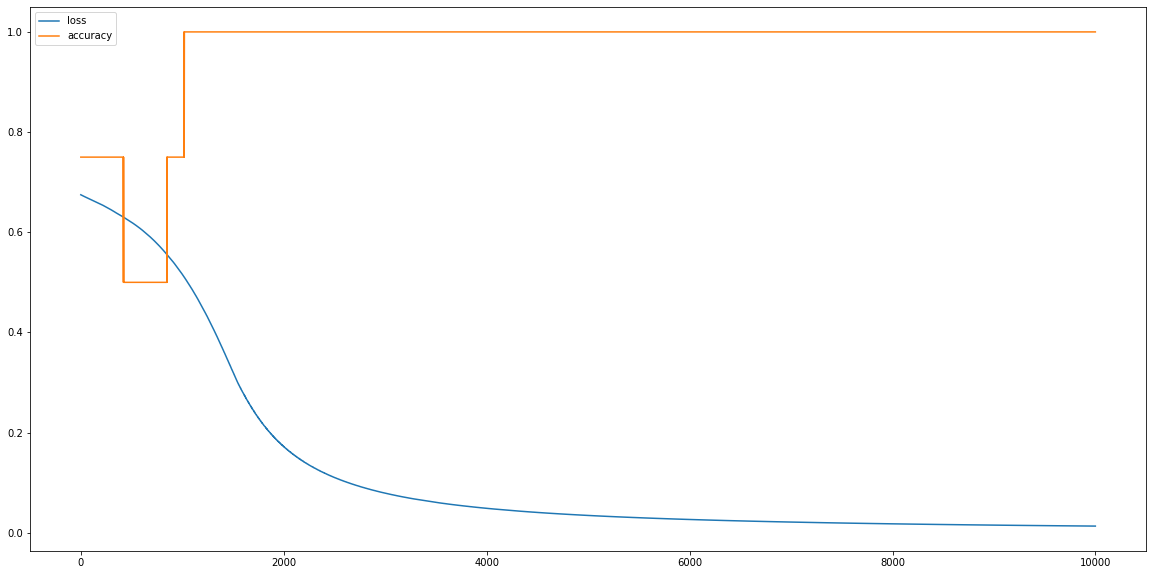

In [18]:
import matplotlib.pyplot as plt

x = np.arange(0, 10000, 1)
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['acc'], label='accuracy')
plt.legend()

In [19]:
pred_y = model.predict(X)

In [20]:
pred_y

array([[0.01938428],
       [0.9983552 ],
       [0.9980318 ],
       [0.02963354]], dtype=float32)

In [21]:
pred_y = [1 if p > 0.9 else 0 for p in pred_y]

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
import seaborn as sb

<AxesSubplot:>

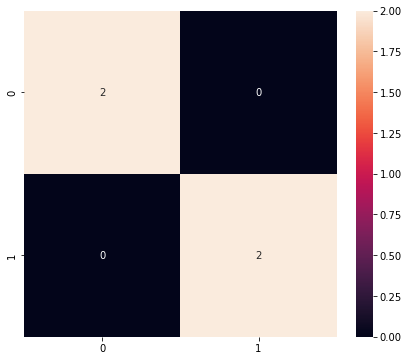

In [24]:
plt.figure(figsize=(7,6))
sb.heatmap(confusion_matrix(pred_y, Y), annot=True)

<h4>1-3-3. pyTorch</h4>

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [5]:
import torch
import torch.nn as nn
from torch.nn import DataParallel
import torch.optim as optim

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
class smallMLP(nn.Module):
    def __init__(self, num_classes=1):
        super(smallMLP, self).__init__()
        self.input = nn.Linear(2, 10, bias=True) # bias는 만일 False로 설정되어 있으면 layer는 bias를 학습하지 않는다. 기본값은 True이다.
        self.hidden1 = nn.Linear(10, 10, bias=True)
        self.output = nn.Linear(10, 1, bias=True)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.input(x))
        x = self.sigmoid(self.hidden1(x))
        x = self.sigmoid(self.output(x))
        return x
    

In [8]:
net = smallMLP(1).to(device)
# net = nn.DataParallel(net).to(device)

In [9]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=1)

In [10]:
X = torch.FloatTensor(X).to(device)
Y = torch.FloatTensor(Y).to(device)

In [11]:
total = 0

for epoch in range(10000):
        
    optimizer.zero_grad()
    outputs = net(X)
    
    loss = criterion(outputs, Y)
    loss.backward()
        
    optimizer.step()
    
    if epoch % 100 == 0:
        print('[%d] loss: %.3f' %(epoch +1, loss.item()))

[1] loss: 0.695
[101] loss: 0.693
[201] loss: 0.693
[301] loss: 0.693
[401] loss: 0.693
[501] loss: 0.693
[601] loss: 0.692
[701] loss: 0.692
[801] loss: 0.691
[901] loss: 0.687
[1001] loss: 0.666
[1101] loss: 0.427
[1201] loss: 0.042
[1301] loss: 0.014
[1401] loss: 0.008
[1501] loss: 0.005
[1601] loss: 0.004
[1701] loss: 0.003
[1801] loss: 0.003
[1901] loss: 0.002
[2001] loss: 0.002
[2101] loss: 0.002
[2201] loss: 0.001
[2301] loss: 0.001
[2401] loss: 0.001
[2501] loss: 0.001
[2601] loss: 0.001
[2701] loss: 0.001
[2801] loss: 0.001
[2901] loss: 0.001
[3001] loss: 0.001
[3101] loss: 0.001
[3201] loss: 0.001
[3301] loss: 0.001
[3401] loss: 0.001
[3501] loss: 0.001
[3601] loss: 0.001
[3701] loss: 0.001
[3801] loss: 0.000
[3901] loss: 0.000
[4001] loss: 0.000
[4101] loss: 0.000
[4201] loss: 0.000
[4301] loss: 0.000
[4401] loss: 0.000
[4501] loss: 0.000
[4601] loss: 0.000
[4701] loss: 0.000
[4801] loss: 0.000
[4901] loss: 0.000
[5001] loss: 0.000
[5101] loss: 0.000
[5201] loss: 0.000
[5301

In [26]:
correct = 0
total = 4

with torch.no_grad():
    outputs = net(X)

    predicted = torch.Tensor([[1] if d > 0.9 else [0] for d in outputs.data])
    # total += labels.size(0)
    correct += (predicted == Y.to('cpu')).sum().item()
    

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 100 %
